In [470]:
# Importo todas las herramientas que me van a hacer falta.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



# Hipótesis: 

#### Se producen más ataques en hombres que en mujeres, ya que los hombres asumen más actividades de riesgo que las mujeres.

In [471]:
# Abro el archivo y lo asigno a la variable df para poder trabajar con él.

df = pd.read_csv("attacks.csv", engine="python")


# Con df.head() veo las cinco primeras filas con todas sus columnas para hacerme una idea del fichero que tengo.

df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [472]:
# Veo la información básica de las columnas, el total de valores no-nulos y el tipo de sus variables.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [473]:
# Ver datos estadísticos básicos.

df.describe()

,Year,original order
count,6300.000000,6309.000000
mean,1927.272381,3155.999683
std,281.116308,1821.396206
min,0.000000,2.000000
25%,1942.000000,1579.000000
50%,1977.000000,3156.000000
75%,2005.000000,4733.000000
max,2018.000000,6310.000000


In [474]:
# Veo el nombre de las columnas del archivo.

print(len(df.columns))

df.columns

24


Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [475]:
# Veo la cantidad de nulos de todas las columnas

df.isnull().sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [476]:
# Reescribo la variable df con las columnas que me interesan. Paso de tener 24 columnas a tener 6.

df = df[['Year','Type', 'Country', 'Activity','Name', 'Sex ']]

df

,Year,Type,Country,Activity,Name,Sex
0,2018.0,Boating,USA,Paddling,Julie Wolfe,F
1,2018.0,Unprovoked,USA,Standing,Adyson McNeely,F
2,2018.0,Invalid,USA,Surfing,John Denges,M
3,2018.0,Unprovoked,AUSTRALIA,Surfing,male,M
4,2018.0,Provoked,MEXICO,Free diving,Gustavo Ramos,M
...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN


In [477]:
# Obtengo información de la columna ['Sex ']

df['Sex '].describe

<bound method NDFrame.describe of 0          F
1          F
2          M
3          M
4          M
        ... 
25718    NaN
25719    NaN
25720    NaN
25721    NaN
25722    NaN
Name: Sex , Length: 25723, dtype: object>

In [478]:
# Veo el total de duplicados en la columna ['Sex ']

df['Sex '].duplicated().sum()

25716

In [479]:
# Veo cuantos duplicados en forma booleana hay en la columna ['Sex '] 

df['Sex '].duplicated()

0        False
1         True
2        False
3         True
4         True
         ...  
25718     True
25719     True
25720     True
25721     True
25722     True
Name: Sex , Length: 25723, dtype: bool

In [480]:
# Veo los registros nulos de todas las columnas

df.isnull().sum()

Year        19423
Type        19425
Country     19471
Activity    19965
Name        19631
Sex         19986
dtype: int64

In [481]:
# Elimino los registros duplicados

df = df.drop_duplicates()
df

,Year,Type,Country,Activity,Name,Sex
0,2018.0,Boating,USA,Paddling,Julie Wolfe,F
1,2018.0,Unprovoked,USA,Standing,Adyson McNeely,F
2,2018.0,Invalid,USA,Surfing,John Denges,M
3,2018.0,Unprovoked,AUSTRALIA,Surfing,male,M
4,2018.0,Provoked,MEXICO,Free diving,Gustavo Ramos,M
...,...,...,...,...,...,...
6298,0.0,Unprovoked,AUSTRALIA,Pearl diving,Ahmun,M
6299,0.0,Unprovoked,USA,Swimming,Coast Guard personnel,M
6300,0.0,Unprovoked,PANAMA,NaN,Jules Patterson,M
6301,0.0,Unprovoked,CEYLON (SRI LANKA),Swimming,male,M


In [482]:
# Veo el tipo de datos de todas las columnas

df.dtypes

Year        float64
Type         object
Country      object
Activity     object
Name         object
Sex          object
dtype: object

In [483]:
# Como los datos de ['Year'] son flotantes los tengo que convertir a int. 
# Pero tengo que convertir los NaN primero a valores int (en este caso 0)

df['Year'] = df['Year'].fillna(0).astype(np.int64)

df['Year']

<ipython-input-483-7d84121a1124>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].fillna(0).astype(np.int64)


0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
6298       0
6299       0
6300       0
6301       0
6302       0
Name: Year, Length: 6227, dtype: int64

In [484]:
# Compruebo que ha cambiado el tipo

df.dtypes

Year         int64
Type        object
Country     object
Activity    object
Name        object
Sex         object
dtype: object

In [485]:
df

,Year,Type,Country,Activity,Name,Sex
0,2018,Boating,USA,Paddling,Julie Wolfe,F
1,2018,Unprovoked,USA,Standing,Adyson McNeely,F
2,2018,Invalid,USA,Surfing,John Denges,M
3,2018,Unprovoked,AUSTRALIA,Surfing,male,M
4,2018,Provoked,MEXICO,Free diving,Gustavo Ramos,M
...,...,...,...,...,...,...
6298,0,Unprovoked,AUSTRALIA,Pearl diving,Ahmun,M
6299,0,Unprovoked,USA,Swimming,Coast Guard personnel,M
6300,0,Unprovoked,PANAMA,NaN,Jules Patterson,M
6301,0,Unprovoked,CEYLON (SRI LANKA),Swimming,male,M


In [486]:
# Quito los NaN

df.dropna(inplace=True)

df

<ipython-input-486-9d0fda8b45b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,Year,Type,Country,Activity,Name,Sex
0,2018,Boating,USA,Paddling,Julie Wolfe,F
1,2018,Unprovoked,USA,Standing,Adyson McNeely,F
2,2018,Invalid,USA,Surfing,John Denges,M
3,2018,Unprovoked,AUSTRALIA,Surfing,male,M
4,2018,Provoked,MEXICO,Free diving,Gustavo Ramos,M
...,...,...,...,...,...,...
6296,0,Unprovoked,AUSTRALIA,Swimming,Arab boy,M
6297,0,Unprovoked,AUSTRALIA,Diving,male,M
6298,0,Unprovoked,AUSTRALIA,Pearl diving,Ahmun,M
6299,0,Unprovoked,USA,Swimming,Coast Guard personnel,M


In [487]:
# Elimino los valores < 1969 (año)

df = df.drop(df[df['Year']<1969].index)

df

,Year,Type,Country,Activity,Name,Sex
0,2018,Boating,USA,Paddling,Julie Wolfe,F
1,2018,Unprovoked,USA,Standing,Adyson McNeely,F
2,2018,Invalid,USA,Surfing,John Denges,M
3,2018,Unprovoked,AUSTRALIA,Surfing,male,M
4,2018,Provoked,MEXICO,Free diving,Gustavo Ramos,M
...,...,...,...,...,...,...
3439,1969,Unprovoked,USA,Surfing,Licius Lee,M
3440,1969,Provoked,AUSTRALIA,Fishing,George Pacey,M
3441,1969,Invalid,AUSTRALIA,Hard hat diving,Elin Anderson,M
3442,1969,Unprovoked,AUSTRALIA,Freediving,Kevin Deacon,M


In [488]:
df['Year'].value_counts()

2015    134
2017    119
2011    117
2013    112
2014    110
2016    109
2009    109
2008    105
2007    104
2012     98
2010     97
2006     91
2005     90
2000     83
2003     82
2004     82
2002     80
2001     75
1995     63
1999     59
1998     59
2018     51
1997     50
1996     49
1992     49
1989     49
1988     48
1994     47
1981     43
1983     43
1993     43
1975     37
1984     36
1990     35
1991     35
1982     34
1970     34
1980     33
1974     32
1985     30
1986     29
1987     27
1972     26
1976     24
1969     22
1977     21
1973     21
1979     20
1978     20
1971     19
Name: Year, dtype: int64

In [489]:
# Agrupo los años por décadas (creo los bins) y agrego una columna llamada 'Decada' al final

df['Decada'] = pd.cut(df.Year,5, labels=range(1970,2020,10))

df['Decada']

0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
3439    1970
3440    1970
3441    1970
3442    1970
3888    1970
Name: Decada, Length: 2985, dtype: category
Categories (5, int64): [1970 < 1980 < 1990 < 2000 < 2010]

In [490]:
# Modifico el nombre de la columna Sex y elimino el espacio

df = df.rename(columns={"Sex ": "Sex"})


In [491]:
# Agrupo por sexo

df.groupby(['Sex'])

df.groupby(['Sex']).get_group('M') # Muestra el grupo M


,Year,Type,Country,Activity,Name,Sex,Decada
2,2018,Invalid,USA,Surfing,John Denges,M,2010
3,2018,Unprovoked,AUSTRALIA,Surfing,male,M,2010
4,2018,Provoked,MEXICO,Free diving,Gustavo Ramos,M,2010
5,2018,Unprovoked,AUSTRALIA,Kite surfing,Chris …,M,2010
6,2018,Unprovoked,BRAZIL,Swimming,Jose Ernesto da Silva,M,2010
...,...,...,...,...,...,...,...
3439,1969,Unprovoked,USA,Surfing,Licius Lee,M,1970
3440,1969,Provoked,AUSTRALIA,Fishing,George Pacey,M,1970
3441,1969,Invalid,AUSTRALIA,Hard hat diving,Elin Anderson,M,1970
3442,1969,Unprovoked,AUSTRALIA,Freediving,Kevin Deacon,M,1970


In [492]:
# Buscar los datos diferntes de 'F' 

data_filter = df[df['Sex'] != "F"]

data_filter

,Year,Type,Country,Activity,Name,Sex,Decada
2,2018,Invalid,USA,Surfing,John Denges,M,2010
3,2018,Unprovoked,AUSTRALIA,Surfing,male,M,2010
4,2018,Provoked,MEXICO,Free diving,Gustavo Ramos,M,2010
5,2018,Unprovoked,AUSTRALIA,Kite surfing,Chris …,M,2010
6,2018,Unprovoked,BRAZIL,Swimming,Jose Ernesto da Silva,M,2010
...,...,...,...,...,...,...,...
3439,1969,Unprovoked,USA,Surfing,Licius Lee,M,1970
3440,1969,Provoked,AUSTRALIA,Fishing,George Pacey,M,1970
3441,1969,Invalid,AUSTRALIA,Hard hat diving,Elin Anderson,M,1970
3442,1969,Unprovoked,AUSTRALIA,Freediving,Kevin Deacon,M,1970


In [493]:
# Buscar los datos diferentes de 'F' y 'M' para eliminarlos

df[(df['Sex'] != "F") & (df['Sex'] != "M")]

df['Sex']

0       F
1       F
2       M
3       M
4       M
       ..
3439    M
3440    M
3441    M
3442    M
3888    M
Name: Sex, Length: 2985, dtype: object

In [514]:
# Reemplazo los valores de "M " y "lli" por "M" ya que los tres valores son hombres.

sexos = df['Sex'].replace({"lli": "M", "M ": "M"})

sexos

0       F
1       F
2       M
3       M
4       M
       ..
3439    M
3440    M
3441    M
3442    M
3888    M
Name: Sex, Length: 2985, dtype: object

In [515]:
# Confirmo los tipos de valores hay dentro de ['Sex ']

sexos.value_counts()

M    2540
F     445
Name: Sex, dtype: int64

In [516]:


x = df.groupby(['Sex']).get_group('M')
y = df.groupby(['Sex']).get_group('F')

In [517]:
df2.dtypes

dtype('O')

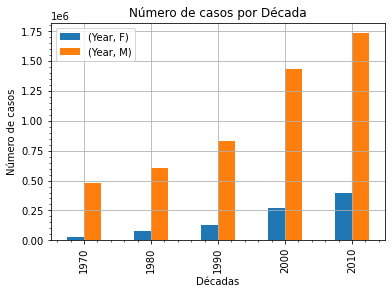

In [559]:
z = df.groupby(['Decada',sexos]).sum().unstack()

z.plot(kind="bar") # Llamada a la función
plt.xlabel('Décadas') # Nombre eje de las x
plt.ylabel('Número de casos') # Nombre eje de las y
plt.legend() # Obtengo la leyenda
plt.title('Número de casos por Década') # Poner título
plt.minorticks_on() # Que se vean subrrayas de división en los ejes
plt.grid() # Sacar la rejilla